<a href="https://colab.research.google.com/github/elinneaeriksson/Applied_AI_Project/blob/main/ah2179_project_NN_script_SPEED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Imports
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:

!pip install keras-tuner --upgrade
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#project_path = '/content/gdrive/MyDrive/Samhällsbyggnadsprogrammet/AH2179/Project/' # set your own project path
#df=pd.read_csv(project_path+'preprocessingV4.csv',sep=';') #Jennifers path
project_path = '/content/gdrive/MyDrive/Project Applied AI/Data/' #Linneas path

train_df=pd.read_csv(project_path+'Preprocessed Data/preprocessingV5.csv',sep=';')


train_df = train_df.dropna()


In [ ]:
eval_df=pd.read_csv(project_path+'Preprocessed Data/evalpreproV3.csv',sep=';') #change
eval_df = eval_df.dropna()
eval_df.describe()

,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
count,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000,197436.000000
mean,442.061387,43.357093,19.925567,661.870155,215.871168,640.875985,2431.370778,19.844674,19.908797,19.935569,20.064293,0.687529,14.263331
std,82.307056,21.142930,2.362819,287.845567,100.108140,300.024576,1241.349348,2.135399,2.223883,2.132143,1.914030,0.463502,2.754295
min,299.000000,1.000000,0.560000,33.000000,8.000000,33.000000,100.000000,2.395607,1.685500,2.395607,4.005448,0.000000,9.000000
25%,371.000000,25.000000,18.976920,418.000000,124.000000,356.000000,1155.000000,18.948944,19.000403,19.017471,19.117466,0.000000,12.000000
50%,442.000000,48.000000,20.109010,770.000000,251.000000,755.000000,2923.000000,20.056423,20.137072,20.173206,20.325783,1.000000,14.000000
75%,513.000000,60.000000,21.216875,887.000000,295.000000,883.000000,3501.000000,21.083684,21.169776,21.186965,21.290345,1.000000,17.000000
max,584.000000,107.000000,35.560000,1254.000000,436.000000,1254.000000,4684.000000,24.257949,25.641731,24.576513,24.003175,1.000000,19.000000


In [ ]:
#peakHour is defined as 7.30-8.30 = 450 minutes after midnight to  510 minutes after midnight
eval_df_peak  = eval_df[(eval_df['Interval_1'] > 450) & (eval_df['Interval_1'] <=510)]

# Save DataFrame to CSV
eval_df_peak.to_csv(project_path+'Preprocessed Data/peakevalpreproV2.csv', sep=';', encoding='utf-8', index=False, header=True)

In [ ]:
train_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
59,"E4S 55,620",2021-06-01,299,46.0,21.201522,809.0,271.0,817.0,3031.0,20.327355,20.489483,20.748605,20.927258,1,9
60,"E4S 55,620",2021-06-01,300,52.0,20.211538,799.0,260.0,822.0,3054.0,20.400551,20.472538,20.694453,20.907895,1,10
61,"E4S 55,620",2021-06-01,301,43.0,19.920930,803.0,256.0,814.0,3071.0,20.416276,20.279102,20.584840,20.885396,1,10
62,"E4S 55,620",2021-06-01,302,51.0,19.504314,823.0,254.0,807.0,3084.0,20.347728,20.111063,20.494610,20.854199,1,10
63,"E4S 55,620",2021-06-01,303,51.0,20.606471,825.0,243.0,783.0,3101.0,20.304024,20.281975,20.542771,20.830094,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604005,"E4S 58,140",2021-12-31,580,18.0,21.883889,272.0,93.0,240.0,827.0,21.605846,21.622043,21.793375,21.557267,0,19
604006,"E4S 58,140",2021-12-31,581,11.0,21.212727,280.0,77.0,240.0,822.0,21.614643,21.765195,21.823500,21.566363,0,19
604007,"E4S 58,140",2021-12-31,582,15.0,21.908000,293.0,69.0,247.0,823.0,21.522355,21.808551,21.851660,21.582333,0,19
604008,"E4S 58,140",2021-12-31,583,16.0,20.883125,300.0,71.0,253.0,826.0,21.543433,21.670704,21.781344,21.582276,0,19


In [ ]:
peak_eval_df=pd.read_csv(project_path+'Preprocessed Data/peakevalpreproV2.csv',sep=';') #change
peak_eval_df

,PORTAL,Date,Interval_1,FLOW_SUM,SPEED_WEIGHTED_AVG,FLOW_NEXT_15_SUM,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,FLOW_PREV_60_SUM,SPEED_NEXT_15_AVG,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG,SPEED_PREV_60_AVG,IS_WEEKDAY,Interval_30
0,"E4S 55,620",2022-01-05,451,34.0,20.723529,535.0,183.0,528.0,2264.0,19.667645,19.924590,19.637822,19.783167,1,15
1,"E4S 55,620",2022-01-05,452,39.0,19.423846,542.0,194.0,535.0,2263.0,19.636033,19.861907,19.577645,19.760420,1,15
2,"E4S 55,620",2022-01-05,453,44.0,18.888636,532.0,195.0,550.0,2264.0,19.726297,19.685436,19.528818,19.752407,1,15
3,"E4S 55,620",2022-01-05,454,35.0,19.148571,535.0,193.0,541.0,2260.0,19.648710,19.564974,19.529261,19.732009,1,15
4,"E4S 55,620",2022-01-05,455,38.0,19.536842,524.0,190.0,549.0,2261.0,19.717195,19.504368,19.555647,19.708859,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41545,"E4S 58,140",2022-06-30,506,66.0,21.448182,919.0,330.0,946.0,3768.0,21.302590,21.522667,21.300666,21.365154,1,16
41546,"E4S 58,140",2022-06-30,507,50.0,20.661600,933.0,302.0,959.0,3760.0,21.347824,21.233344,21.265068,21.355133,1,16
41547,"E4S 58,140",2022-06-30,508,77.0,19.574805,921.0,317.0,970.0,3780.0,21.481379,21.013943,21.180227,21.318696,1,16
41548,"E4S 58,140",2022-06-30,509,49.0,22.113673,944.0,304.0,944.0,3757.0,21.406324,21.037599,21.176419,21.330000,1,16


In [ ]:
#choose input features
train_df = train_df[['SPEED_NEXT_15_AVG','FLOW_PREV_5_SUM','FLOW_PREV_15_SUM','IS_WEEKDAY', 'Interval_30','SPEED_PREV_5_AVG','SPEED_PREV_15_AVG']]
#train_df = train_df[['FLOW_NEXT_15_SUM','FLOW_PREV_15_SUM']]

#train_df = train_df.iloc[:30000] #use a smaller dataset while tuning the model to make it a bit faster

x = train_df.drop(['SPEED_NEXT_15_AVG'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = train_df['SPEED_NEXT_15_AVG']

# split the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(X_test)


        FLOW_PREV_5_SUM  FLOW_PREV_15_SUM  IS_WEEKDAY  Interval_30  \
81837             303.0             884.0           1           17   
77732             271.0             872.0           1           13   
480987            237.0             744.0           1           17   
262589            367.0            1098.0           1           13   
505234             90.0             230.0           0           13   
...                 ...               ...         ...          ...   
307396            345.0             956.0           1           17   
84862             248.0             785.0           1           10   
508468            318.0             896.0           1           12   
542160             31.0              86.0           0           10   
470411            120.0             323.0           1           16   

        SPEED_PREV_5_AVG  SPEED_PREV_15_AVG  
81837          19.761056          19.808620  
77732          20.517897          20.610585  
480987         19.816

In [ ]:

# Find optimal nn construction using keras tuner
# Recommended resources:
# https://keras.io/keras_tuner/
# https://www.youtube.com/watch?v=6Nf1x7qThR8

def build_model(hp):

  hp_l1_units = hp.Int('l1_units', min_value=32, max_value=64, step=16)
  #hp_l1_droprate = hp.Choice('l1_droprate', values=[0.0, 0.2])
  hp_l2_units = hp.Int('l2_units', min_value=32, max_value=64, step=16)
  #hp_l2_droprate = hp.Choice('l1_droprate', values=[0.0, 0.2])
  hp_l3_units = hp.Int('l3_units', min_value=16, max_value=32, step=16)
  #hp_l3_droprate = hp.Choice('l3_droprate', values=[0.0, 0.2])
  #hp_activation = hp.Choice('activation', values=['relu', 'sigmoid'])
  #hp_lr = hp.Choice('lr', values=[0.01, 0.001])
  model = Sequential()
  model.add(Dense(hp_l1_units, activation='relu', input_dim=6))
  #model.add(Dropout(hp_l1_droprate))
  model.add(Dense(hp_l2_units))
  #model.add(Dropout(hp_l2_droprate))
  model.add(Dense(hp_l3_units, activation='relu'))
  #model.add(Dropout(hp_l3_droprate))
  model.add(Dense(1))
  model.compile(optimizer=Adam(0.01), loss='mae', metrics=['mae'])

  return model

tuner = kt.Hyperband(build_model,
                     objective='val_mae',
                     max_epochs=50,
                     factor=3,
                     seed=42,
                     directory='ah2179',
                     project_name='traffic_project')

early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop, reduce_lr])

Trial 17 Complete [00h 01m 08s]
val_mae: 0.41802555322647095

Best val_mae So Far: 0.38990482687950134
Total elapsed time: 00h 18m 50s


In [ ]:

# Check the best hyperparameters

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

for hp_name, hp_value in best_hps.values.items():
    print(f"{hp_name}: {hp_value}")


l1_units: 32
l2_units: 32
l3_units: 16
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0


In [ ]:
# Make the best model

best_model = tuner.hypermodel.build(best_hps)
best_model.save(project_path + 'model1Speed.keras')
history = best_model.fit(X_train, y_train, epochs=50, validation_split=0.2, batch_size=32, callbacks=[early_stop, reduce_lr])


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9531/9531 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 1.8089 - mae: 1.8089 - val_loss: 1.0178 - val_mae: 1.0178 - learning_rate: 0.0100
Epoch 2/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.4855 - mae: 0.4855 - val_loss: 0.4053 - val_mae: 0.4053 - learning_rate: 0.0100
Epoch 3/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.4673 - mae: 0.4673 - val_loss: 0.5733 - val_mae: 0.5733 - learning_rate: 0.0100
Epoch 4/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - loss: 0.4575 - mae: 0.4575 - val_loss: 0.4376 - val_mae: 0.4376 - learning_rate: 0.0100
Epoch 5/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.4533 - mae: 0.4533 - val_loss: 0.5592 - val_mae: 0.5592 - learning_rate: 0.0100
Epoch 6/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - loss: 0.4327 - mae: 0.4327 - val_loss: 0.4398 - val_mae: 0.4398 - learning_rate: 0.0050
Epoch 7/50
9531/9531 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.4235 - mae: 0.4235 - val_loss: 0.4211 - val_mae: 0.4211 - learning_rate: 0.0

In [ ]:
# Check the history

pd.DataFrame(history.history)

,loss,mae,val_loss,val_mae,learning_rate
0,0.757577,0.757577,1.017841,1.017841,0.010
1,0.479168,0.479168,0.405255,0.405255,0.010
2,0.466148,0.466148,0.573275,0.573275,0.010
3,0.456366,0.456366,0.437581,0.437581,0.010
4,0.456448,0.456448,0.559171,0.559171,0.010
5,0.425911,0.425911,0.439820,0.439820,0.005
6,0.422996,0.422996,0.421122,0.421122,0.005


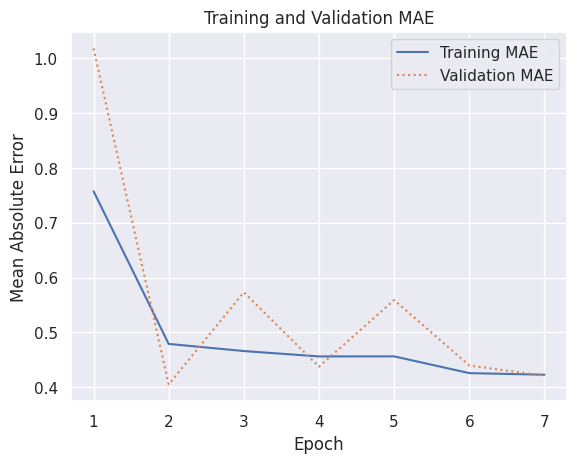

In [ ]:
# Plot the training and validation MAE

sns.set()

err = history.history['mae']
val_err = history.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Evaluate the best model with test data (not evaluation)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------Result from the best model on test data ---------------------------------------------')
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


2979/2979 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
--------------------------------------Result from the best model on test data ---------------------------------------------
Mean Absolute Error: 0.4106756623395462
Mean Squared Error: 0.6558442697005674
R-squared: 0.8433650811312575


# Evaluation data

In [ ]:
# Evaluate the best model with evaluation data

eval_df = eval_df[['SPEED_NEXT_15_AVG','FLOW_PREV_5_SUM','FLOW_PREV_15_SUM','IS_WEEKDAY', 'Interval_30','SPEED_PREV_5_AVG','SPEED_PREV_15_AVG']]

x_eval = eval_df.drop(['SPEED_NEXT_15_AVG'], axis=1)
y_eval = eval_df['SPEED_NEXT_15_AVG']

print(x_eval)
#print(X_test)

y_pred = best_model.predict(x_eval)

mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

print('--------------------------------------Result from the best model on evaluation data---------------------------------------------')
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


        FLOW_PREV_5_SUM  FLOW_PREV_15_SUM  IS_WEEKDAY  Interval_30  \
59                125.0             384.0           1            9   
60                134.0             392.0           1           10   
61                126.0             389.0           1           10   
62                127.0             389.0           1           10   
63                120.0             386.0           1           10   
...                 ...               ...         ...          ...   
249818            266.0             838.0           1           19   
249819            282.0             838.0           1           19   
249820            288.0             854.0           1           19   
249821            310.0             867.0           1           19   
249822            310.0             869.0           1           19   

        SPEED_PREV_5_AVG  SPEED_PREV_15_AVG  
59             21.046960          20.884609  
60             21.257388          21.017653  
61             21.344

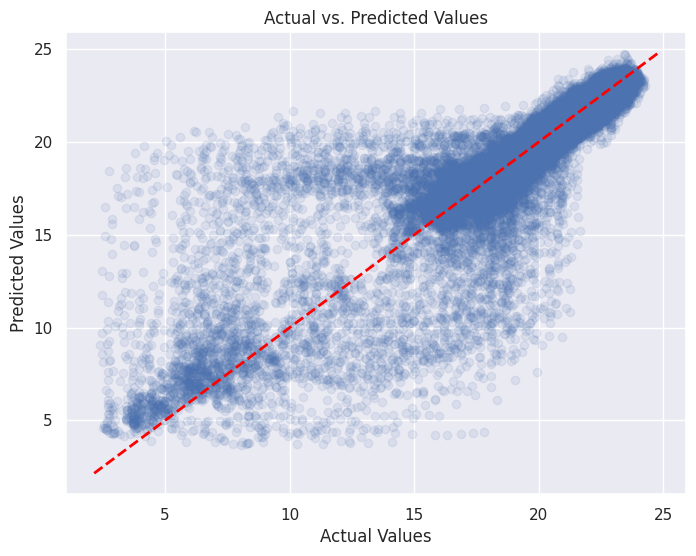

In [ ]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_eval, y_pred, alpha=0.1)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

## Evaluation peak period

In [ ]:
# Evaluate the best model with evaluation data

eval_df_peak = peak_eval_df[['SPEED_NEXT_15_AVG','FLOW_PREV_5_SUM','FLOW_PREV_15_SUM','IS_WEEKDAY', 'Interval_30','SPEED_PREV_5_AVG','SPEED_PREV_15_AVG']]

x_eval = eval_df_peak.drop(['SPEED_NEXT_15_AVG'], axis=1)
y_eval = eval_df_peak['SPEED_NEXT_15_AVG']

print(x_eval)
#print(X_test)

y_pred = best_model.predict(x_eval)

mae = mean_absolute_error(y_eval, y_pred)
mse = mean_squared_error(y_eval, y_pred)
r2 = r2_score(y_eval, y_pred)

print('--------------------------------------Result from the best model on evaluation data---------------------------------------------')
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
eval_df_peak

       FLOW_PREV_5_SUM  FLOW_PREV_15_SUM  IS_WEEKDAY  Interval_30  \
0                183.0             528.0           1           15   
1                194.0             535.0           1           15   
2                195.0             550.0           1           15   
3                193.0             541.0           1           15   
4                190.0             549.0           1           15   
...                ...               ...         ...          ...   
41545            330.0             946.0           1           16   
41546            302.0             959.0           1           16   
41547            317.0             970.0           1           16   
41548            304.0             944.0           1           16   
41549            300.0             950.0           1           17   

       SPEED_PREV_5_AVG  SPEED_PREV_15_AVG  
0             19.924590          19.637822  
1             19.861907          19.577645  
2             19.685436          19.

,SPEED_NEXT_15_AVG,FLOW_PREV_5_SUM,FLOW_PREV_15_SUM,IS_WEEKDAY,Interval_30,SPEED_PREV_5_AVG,SPEED_PREV_15_AVG
0,19.667645,183.0,528.0,1,15,19.924590,19.637822
1,19.636033,194.0,535.0,1,15,19.861907,19.577645
2,19.726297,195.0,550.0,1,15,19.685436,19.528818
3,19.648710,193.0,541.0,1,15,19.564974,19.529261
4,19.717195,190.0,549.0,1,15,19.504368,19.555647
...,...,...,...,...,...,...,...
41545,21.302590,330.0,946.0,1,16,21.522667,21.300666
41546,21.347824,302.0,959.0,1,16,21.233344,21.265068
41547,21.481379,317.0,970.0,1,16,21.013943,21.180227
41548,21.406324,304.0,944.0,1,16,21.037599,21.176419


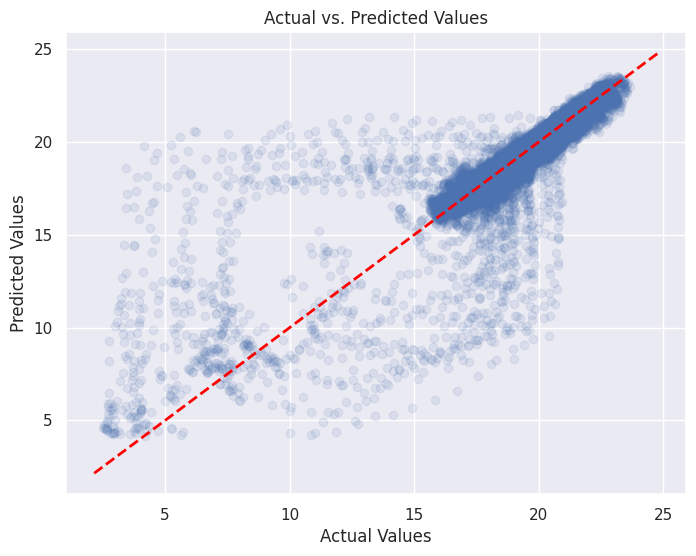

In [ ]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_eval, y_pred, alpha=0.1)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [ ]:
best_model.save(project_path + 'best_model.keras')

## This is not used:

In [ ]:
"""
#-------------------------------------------------network construction------------------------------------------------------------------
#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************


# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=1)) # what are the dimensions

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

#model.add(Dropout(0.2))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


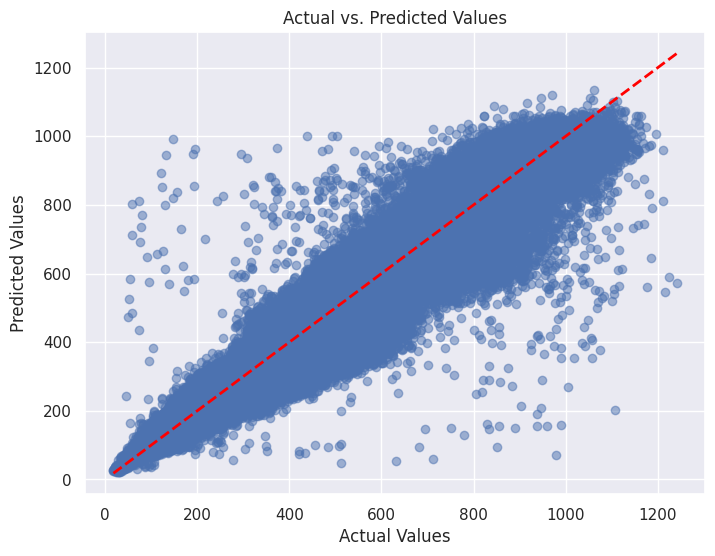

In [ ]:
"""# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()